Importamos libreria pandas para poder leer el archivo ya preparado para ML

In [3]:
import pandas as pd 

In [4]:
data = pd.read_csv('data_ML.csv')

In [5]:
data.head()

,Unnamed: 0,AGE,PTEDUCAT,APOE4,MMSE,imputed_genotype,APOE Genotype,DX_SUB,DX0,DX1,DX2,PTGENDER0,PTGENDER1,PTETHCAT0,PTETHCAT1,PTETHCAT2,PTRACCAT0,PTRACCAT1,PTRACCAT2
0,0,81.3,18,1,20,1,"3,4",AD,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
1,1,67.5,10,0,27,0,"3,3",MCI,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
2,2,73.7,16,0,29,1,"3,3",CN,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
3,3,80.4,13,0,25,1,"3,3",MCI,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,4,73.9,12,1,24,1,"3,4",AD,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 628 entries, 0 to 627
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        628 non-null    int64  
 1   AGE               628 non-null    float64
 2   PTEDUCAT          628 non-null    int64  
 3   APOE4             628 non-null    int64  
 4   MMSE              628 non-null    int64  
 5   imputed_genotype  628 non-null    int64  
 6   APOE Genotype     628 non-null    object 
 7   DX_SUB            628 non-null    object 
 8   DX0               628 non-null    float64
 9   DX1               628 non-null    float64
 10  DX2               628 non-null    float64
 11  PTGENDER0         628 non-null    float64
 12  PTGENDER1         628 non-null    float64
 13  PTETHCAT0         628 non-null    float64
 14  PTETHCAT1         628 non-null    float64
 15  PTETHCAT2         628 non-null    float64
 16  PTRACCAT0         628 non-null    float64
 1

In [7]:
data['APOE Genotype'] = data['APOE Genotype'].str.replace(',', '.')
data['APOE Genotype'] = data['APOE Genotype'].astype(float)

Borramos columna que no aporta datos por ser identificador, como Unnamed:

In [8]:
data = data.drop('Unnamed: 0', axis = 1)

Se dividen los registros en dos muestras: de entrenamiento y de evaluación. 

In [9]:
from sklearn.model_selection import train_test_split

features = data.drop('DX_SUB', axis = 1).values 
target = data['DX_SUB'].values

x_train, x_test, y_train, y_test = train_test_split(features, target, test_size = 0.3, random_state = 42, stratify = target)

Se ejecuta el algoritmo con las variables creadas. 

In [10]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(criterion = 'gini', random_state = 50)

dt.fit(x_train, y_train)

DecisionTreeClassifier(random_state=50)

In [22]:
dt.score(x_train, y_train)

1.0

In [11]:
dt.score(x_test, y_test)

1.0

Si bien da una buena precisión, veamos cuantas capas nos recomiendan

In [23]:
from sklearn.model_selection import GridSearchCV

grid_params = {
    'max_depth': [1,2,3,4,5,6],
    'min_samples_leaf': [0.02,0.04, 0.06, 0.08]
}


grid_object = GridSearchCV(estimator = dt, param_grid = grid_params, scoring = 'accuracy', cv = 10, n_jobs = -1)

In [24]:
grid_object.fit(x_train, y_train)

#Mejor parametro

grid_object.best_params_

{'max_depth': 2, 'min_samples_leaf': 0.02}

Probamos el modelo modificando las capas

In [25]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(criterion='gini', random_state=50)
parametros_personalizados = {'max_depth': 2, 'min_samples_leaf': 0.02}

dt.set_params(**parametros_personalizados)

dt.fit(x_train, y_train)

dt.score(x_test, y_test)

1.0

In [12]:
from sklearn import tree
import matplotlib.pyplot as plt

In [20]:
data['DX_SUB'].value_counts()

DX_SUB
MCI    305
CN     190
AD     133
Name: count, dtype: int64

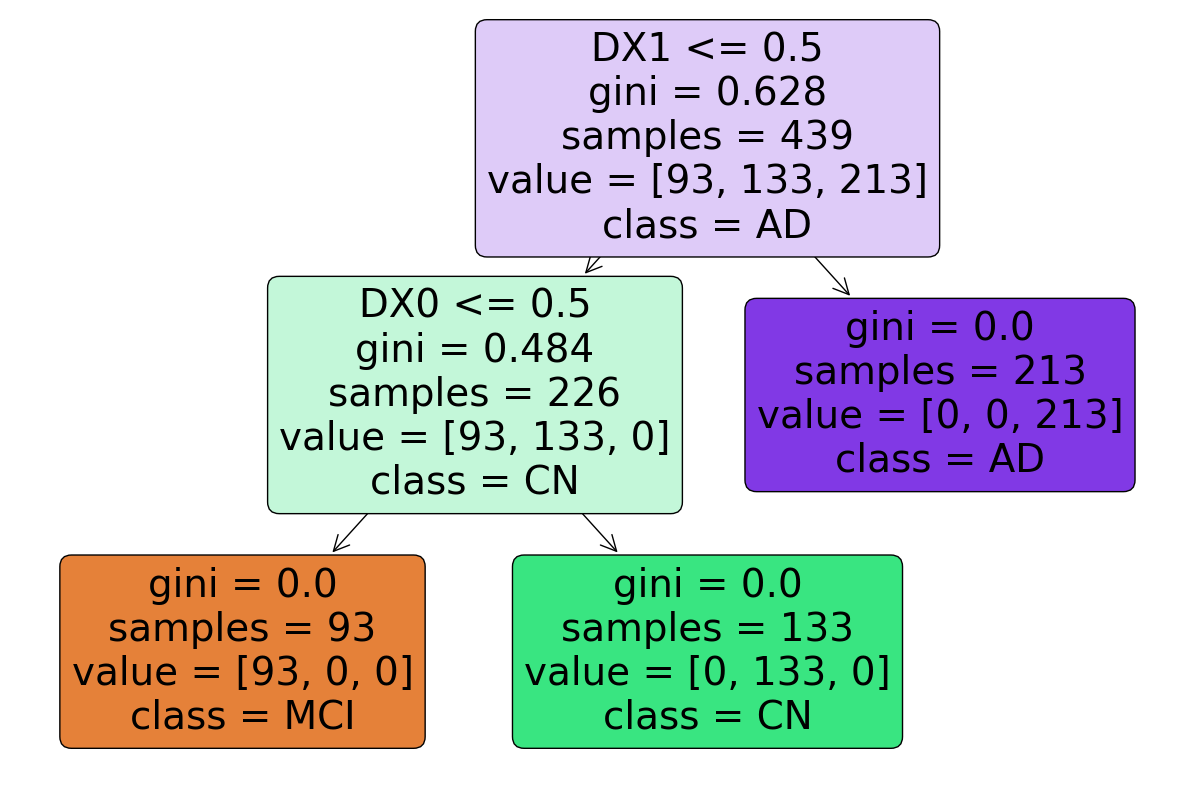

In [26]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

feature_names = list(data.columns[:-1])

# Visualizar el árbol de decisión
plt.figure(figsize=(15, 10))  # Ajusta el tamaño de la figura según tus necesidades
plot_tree(dt, feature_names=feature_names, class_names=["MCI", "CN", "AD"], filled=True, rounded=True)
plt.show()

Evaluamos metricas del modelo determinando y_pred y y_true (y_test)

In [28]:
y_pred = dt.predict(x_test)

In [33]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)



In [34]:
print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print(confusion)
print("Classification Report:")
print(report)

Accuracy: 1.0
Confusion Matrix:
[[40  0  0]
 [ 0 57  0]
 [ 0  0 92]]
Classification Report:
              precision    recall  f1-score   support

          AD       1.00      1.00      1.00        40
          CN       1.00      1.00      1.00        57
         MCI       1.00      1.00      1.00        92

    accuracy                           1.00       189
   macro avg       1.00      1.00      1.00       189
weighted avg       1.00      1.00      1.00       189



In [36]:
print("Accuracy - test set: %.2f%%" % (accuracy*100.0))


Accuracy - test set: 100.00%
